## IMDB Datasets

In [1]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
import matplotlib.pyplot as plt

from keras.datasets import imdb
# https://www.imdb.com/
(X, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\Astrocyte\anaconda3\envs\GPU\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Astrocyte\anaconda3\envs\GPU\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

In [2]:
# text to vector
def vect(seq, dim=10000):
    x=np.zeros((len(seq),dim))
    for n, i in enumerate(seq):
        x[n, i] = 1
    return x

X_train=vect(X)
X_test=vect(X_test)

In [3]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [4]:
net = models.Sequential()
net.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(16, activation='relu'))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(1, activation='sigmoid'))
net.compile(optimizer='nadam', loss='binary_crossentropy', metrics = ['acc'])

X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

val = net.fit(partial_X_train
              , partial_y_train
              , epochs=5, batch_size=128
              , validation_data=(X_val, y_val))

Epoch 1/5
118/118 [==============================] - 8s 64ms/step - loss: 0.5886 - acc: 0.6754 - val_loss: 0.4021 - val_acc: 0.8657
Epoch 2/5
118/118 [==============================] - 5s 46ms/step - loss: 0.3824 - acc: 0.8420 - val_loss: 0.2885 - val_acc: 0.8877
Epoch 3/5
118/118 [==============================] - 5s 43ms/step - loss: 0.2873 - acc: 0.8949 - val_loss: 0.2761 - val_acc: 0.8870
Epoch 4/5
118/118 [==============================] - 6s 48ms/step - loss: 0.2322 - acc: 0.9147 - val_loss: 0.2836 - val_acc: 0.8869
Epoch 5/5
118/118 [==============================] - 5s 46ms/step - loss: 0.2000 - acc: 0.9283 - val_loss: 0.3051 - val_acc: 0.8878


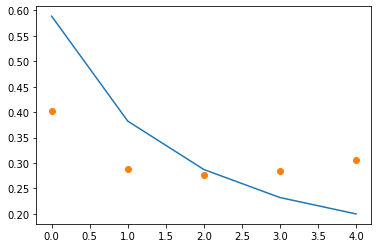

In [5]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']
x = np.arange(0,len(loss))

plt.plot(x,loss,'-')
plt.plot(x,val_loss,'o')

In [6]:
net.evaluate(X_test,y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.3279 - acc: 0.8784


[0.327887624502182, 0.8784400224685669]

#### IMDB Classification using simple RNN

In [7]:
from keras.preprocessing import sequence

max_words=10000 
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

maxlen = 100 # sequence length
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\Astrocyte\anaconda3\envs\GPU\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Astrocyte\anaconda3\envs\GPU\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) i

In [8]:
word2index=imdb.get_word_index()
index2word={y:x for x,y in word2index.items()}
index2word[0]=''

In [9]:
review_index=513
print(" ".join([index2word[idx] for idx in X_train[review_index]]))
X_train[review_index],y_train[review_index]

i'm plot something and was worker in character in of here was brother such redemption came i i of lawyer today something instantly we movie monster and and to and of little movies believe more than good very front of adams br is gonna watchable but despite than his expanded that's this think by becomes but either kills quickly i i his by br called and and understand movie in got called and end all died for too this us on i i little to love 19th cult of solid narrator including than is amanda what exploitative considered i i


(array([ 143,  111,  139,    2,   13, 3501,    8,  106,    8,    4,  130,
          13,  594,  138, 3262,  382,   10,   10,    4, 2405,  636,  139,
        3502,   72,   17,  966,    2,    2,    5,    2,    4,  114,   99,
         261,   50,   71,   49,   52, 1008,    4, 4598,    7,    6, 2143,
        1750,   18,  463,   71,   24, 9187,  195,   11,  101,   31,  458,
          18,  342, 1095,  943,   10,   10,   24,   31,    7,  443,    2,
           2,  388,   17,    8,  185,  443,    2,  127,   29, 1128,   15,
          96,   11,  175,   20,   10,   10,  114,    5,  116, 5266, 1212,
           4, 1153, 3867,  584,   71,    6, 4428,   48, 7527, 1189,   10,
          10]),
 0)

In [10]:
X_val_rnn = X_train[:10000]
partial_X_train_rnn = X_train[10000:]

y_val_rnn = y_train[:10000]
partial_y_train_rnn = y_train[10000:]

In [11]:
rnn = models.Sequential()
rnn.add(layers.Embedding(max_words, 16))# 각각의 단어를 n=16 차원 공간에 올리기
rnn.add(layers.Dropout(0.5))
rnn.add(layers.SimpleRNN(16,return_sequences='True'))
rnn.add(layers.Dropout(0.5))
rnn.add(layers.SimpleRNN(64,return_sequences='True'))
rnn.add(layers.Dropout(0.5))
rnn.add(layers.SimpleRNN(128))
rnn.add(layers.Dense(128,activation='relu'))
rnn.add(layers.Dense(128,activation='relu'))
rnn.add(layers.Dense(1, activation='sigmoid'))
rnn.compile(optimizer='nadam', loss='binary_crossentropy', metrics = ['acc'])

In [12]:
rnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 16)          0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, None, 16)          528       
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 16)          0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 64)          5184      
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 128)              

In [13]:
val2=rnn.fit(partial_X_train_rnn
            ,partial_y_train_rnn
            , epochs=5, batch_size=128
            , validation_data=(X_val_rnn, y_val_rnn))

Epoch 1/5
118/118 [==============================] - 38s 319ms/step - loss: 0.6965 - acc: 0.5079 - val_loss: 0.7197 - val_acc: 0.5055
Epoch 2/5
118/118 [==============================] - 38s 319ms/step - loss: 0.5730 - acc: 0.7063 - val_loss: 0.5070 - val_acc: 0.8026
Epoch 3/5
118/118 [==============================] - 37s 315ms/step - loss: 0.4283 - acc: 0.8148 - val_loss: 0.7475 - val_acc: 0.7920
Epoch 4/5
118/118 [==============================] - 38s 320ms/step - loss: 0.3629 - acc: 0.8520 - val_loss: 0.4557 - val_acc: 0.7843
Epoch 5/5
118/118 [==============================] - 37s 311ms/step - loss: 0.3228 - acc: 0.8694 - val_loss: 0.3744 - val_acc: 0.8384


In [14]:
rnn.evaluate(X_test,y_test)

782/782 [==============================] - 25s 31ms/step - loss: 0.3838 - acc: 0.8361


[0.3837985098361969, 0.836080014705658]

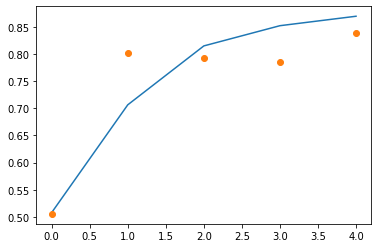

In [15]:
val2_dict = val2.history
loss = val2_dict['acc']
val_loss = val2_dict['val_acc']
x = np.arange(0,len(loss))

plt.plot(x,loss,'-')
plt.plot(x,val_loss,'o')

기존의 Neural Network와 달리 검색을 통해 얻을 수 있는 Model Achitecture가 거의 없었다. 따라서 직접적으로 그 경향성을 파악하여 모델을 구성해보기로 하였다.


|Model Achitecture  |epochs|Trained Accuracy|Validated Accuracy |Test Accuracy |
|:----------------: |:----:|:--------------:|:-----------------:|:------------:|
|MLP                |5     |94.03 %         | 88.60 %           |87.48 %       |
|RNN(16)            |5     |92.82 %         | 82.10 %           |81.58 %       |
|RNN(16,16)         |5     |98.85 %         | 80.94 %           |80.14 %       |
|RNN(16,16,16)      |5     |96.14 %         | 82.02 %           |81.46 %       |
|RNN(16,16,16,16)   |5     |95.47 %         | 76.14 %           |76.05 %       |
|RNN(32)            |5     |96.55 %         | 81.08 %           |80.52 %       |
|RNN(32,32)         |5     |97.27 %         | 73.09 %           |72.66 %       |
|RNN(32,32,32)      |5     |98.19 %         | 80.38 %           |79.40 %       |
|RNN(32,32,32,32)   |5     |91.36 %         | 80.11 %           |79.24 %       |
|RNN(32,32,32,32,32)|5     |90.65 %         | 80.74 %           |80.51 %       |
|RNN(32,32,32,32,32,32)|5  |81.23 %         | 73.00 %           |72.23 %       |
|RNN(64)            |5     |93.19 %         | 80.63 %           |80.07 %       |
|RNN(64,64)         |5     |97.35 %         | 75.06 %           |74.76 %       |
|RNN(64,64,64)      |5     |95.17 %         | 55.07 %           |54.57 %       |
|RNN(128)           |5     |85.85 %         | 80.74 %           |80.89 %       |
|RNN(128,128)       |5     |90.87 %         | 55.97 %           |55.54 %       |
|RNN(128,128,128)   |5     |51.19 %         | 50.55 %           |50.54 %       |
|RNN(254)           |5     |61.91 %         | 57.43 %           |57.43 %       |

단순하게 RNN만 가지고 model를 설정한 경우를 비교해 보았다. 그랬을 때 정확도가 가장 높은 것은 node 16개인 RNN를 1 layer만 설정한 것이다. 그 다음으로 node 16개인 RNN을 3 layer 설정한 것이 좋았다. model의 overfitting을 고려하면, test data에 대한 정확도가 높으면서도, trained data에 대한 정확도와 별로 차이가 나지 않는 것이 좋다. 128 node RNN을 1 layer만 model, 16 node RNN을 1 layer만 설정한 모델, 32 node RNN을 5layer만 설정한 모델이 좋다. 따라서 이 3가지를 기준으로 모델을 다시 설계하였다. Dense net 넣으면 1퍼 정도 정확도가 늘어나지만, 그 이상의 효과를 보기는 힘들었다.

#### 번외: CNN + RNN

In [16]:
cornn=models.Sequential()
cornn.add(layers.Embedding(max_words, 16))
cornn.add(layers.Dropout(0.5))
cornn.add(layers.Conv1D(filters=32,kernel_size=3,padding='same',activation='relu'))
cornn.add(layers.Dropout(0.5))
cornn.add(layers.MaxPooling1D(pool_size=2))
cornn.add(layers.SimpleRNN(128))
cornn.add(layers.Dense(1,activation='sigmoid'))
cornn.compile(optimizer='nadam', loss='binary_crossentropy', metrics = ['acc'])

In [ ]:
cornn.summary()

In [17]:
val3 =cornn.fit(partial_X_train_rnn
                ,partial_y_train_rnn
                , epochs=9, batch_size=64
                , validation_data=(X_val_rnn, y_val_rnn))

Epoch 1/9
235/235 [==============================] - 15s 65ms/step - loss: 0.6956 - acc: 0.5128 - val_loss: 0.6867 - val_acc: 0.5597
Epoch 2/9
235/235 [==============================] - 15s 63ms/step - loss: 0.6320 - acc: 0.6368 - val_loss: 0.6198 - val_acc: 0.6705
Epoch 3/9
235/235 [==============================] - 15s 63ms/step - loss: 0.4677 - acc: 0.7842 - val_loss: 0.4576 - val_acc: 0.8026
Epoch 4/9
235/235 [==============================] - 15s 63ms/step - loss: 0.3930 - acc: 0.8282 - val_loss: 0.3872 - val_acc: 0.8331
Epoch 5/9
235/235 [==============================] - 15s 66ms/step - loss: 0.3415 - acc: 0.8565 - val_loss: 0.3748 - val_acc: 0.8367
Epoch 6/9
235/235 [==============================] - 15s 65ms/step - loss: 0.3555 - acc: 0.8517 - val_loss: 0.3908 - val_acc: 0.8293
Epoch 7/9
235/235 [==============================] - 15s 65ms/step - loss: 0.3048 - acc: 0.8766 - val_loss: 0.3612 - val_acc: 0.8443
Epoch 8/9
235/235 [==============================] - 15s 65ms/step - 

In [18]:
cornn.evaluate(X_test,y_test)

782/782 [==============================] - 6s 8ms/step - loss: 0.3862 - acc: 0.8281


[0.38624078035354614, 0.8281199932098389]

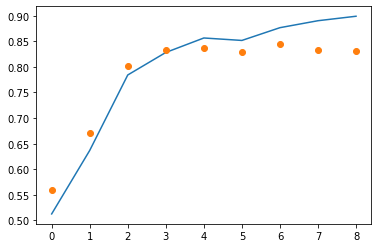

In [19]:
val3_dict = val3.history
loss = val3_dict['acc']
val_loss = val3_dict['val_acc']
x = np.arange(0,len(loss))

plt.plot(x,loss,'-')
plt.plot(x,val_loss,'o')

### Result

여러 가지 모델을 테스트해보고, 인터넷 서칭도 해보았으나, MLP의 결과 87%를 넘어서는 SimpleRNN model을 찾을 수 없었다. Simple RNN의 경우 전체 데이터 Sequence에서 주로 근처의 data만 영향을 미쳐서,사람처럼 문장 전체를 이해하기 힘들다고 한다. 따라서 과거의 sequence를 잘 기억하는 LSTM, GRU 같은 model들이 그 성능이 좋다고 한다. (참고로 현재 이 dataset에 대한 가장 정확한 모델은 "NB-weighted-BON + dv-cosine"이고, 정확도는 97.4%라고 한다.) 또한, LSTM도 좋아야 88%의 정확도를 가진다고 한다. 따라서 MLP에서 이용한 특정 단어가 등장하는 횟수로 감정을 평가하는 것은 실제로 꽤 의미있다는 것을 말해준다.\
Sentiment Analysis on IMDb Dataset Benchmark: https://paperswithcode.com/sota/sentiment-analysis-on-imdb

In [40]:
#출처: https://wikidocs.net/24586

import re

def sentiment_predict(new_sentence,model):
    new_sentence = re.sub('[^0-9a-zA-Z ]', '', new_sentence).lower()
    encoded = []
    for word in new_sentence.split():
        try :
            if word2index[word] <= 10000:
                encoded.append(word2index[word]+3)
            else:
                encoded.append(2)
        except KeyError:
            encoded.append(2)
    if model == net:
        pad_new = vect([encoded])
    else:
        pad_new = sequence.pad_sequences([encoded], maxlen = max_words) # 패딩
    score = float(model.predict(pad_new)) # 예측
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [1]:
Review1="I've said it 100 times, and I'll say it again. This is the best film ever made. If you know me, you know how much I adore it. I'll keep this short but you could say so much about this film. I've seen it maybe 15 times and it still has the same effect on me.The cast is stunning and so perfect. Cate Blanchett is obviously iconic and can play any role, but just seems to fit Carol so well. Mara, Paulson and Chandler are also A+. The SOUNDTRACK... breath taking. Carter Burwell has truly done it again. Chuck a few 50s classics in there and you literally can't beat it. Cinematography, set design, costume, script - all amazing. No wonder it took about 100 years to get on to our screens. If you like Sirk or melodrama in general, this will be up your alley.Todd Haynes, you are a bloody genius."
Review1 #영화 "carol" 10점 리뷰. 장르: 멜로, 로맨스

"I've said it 100 times, and I'll say it again. This is the best film ever made. If you know me, you know how much I adore it. I'll keep this short but you could say so much about this film. I've seen it maybe 15 times and it still has the same effect on me.The cast is stunning and so perfect. Cate Blanchett is obviously iconic and can play any role, but just seems to fit Carol so well. Mara, Paulson and Chandler are also A+. The SOUNDTRACK... breath taking. Carter Burwell has truly done it again. Chuck a few 50s classics in there and you literally can't beat it. Cinematography, set design, costume, script - all amazing. No wonder it took about 100 years to get on to our screens. If you like Sirk or melodrama in general, this will be up your alley.Todd Haynes, you are a bloody genius."

In [28]:
print('--- MLP ---')
sentiment_predict(Review1,net)
print('--- RNN ---')
sentiment_predict(Review1,rnn)
print('--- CNN + RNN ---')
sentiment_predict(Review1,cornn)

--- MLP ---
99.58% 확률로 긍정 리뷰입니다.
--- RNN ---
97.82% 확률로 긍정 리뷰입니다.
--- CNN + RNN ---
90.16% 확률로 긍정 리뷰입니다.


In [30]:
Review2="The art of good film making has been lost in the last decade. A whole lot of structural and continuity issues here with a weak script that gives JJ Abrams the opportunity to sell games and merchandise. The main actress has only one expression like she is angry at herself, as well as the audience. Suggestion: there are only 6 episodes of Star Wars ever and only 3 of them are good.|"
Review2 # 영화 "Star Wars: Episode IX - The Rise of Skywalker" 1점 리뷰, 장르 액션 영화

'The art of good film making has been lost in the last decade. A whole lot of structural and continuity issues here with a weak script that gives JJ Abrams the opportunity to sell games and merchandise. The main actress has only one expression like she is angry at herself, as well as the audience. Suggestion: there are only 6 episodes of Star Wars ever and only 3 of them are good.|'

In [32]:
print('--- MLP ---')
sentiment_predict(Review2,net)
print('--- RNN ---')
sentiment_predict(Review2,rnn)
print('--- CNN + RNN ---')
sentiment_predict(Review2,cornn)

--- MLP ---
92.90% 확률로 부정 리뷰입니다.
--- RNN ---
81.27% 확률로 부정 리뷰입니다.
--- CNN + RNN ---
92.26% 확률로 부정 리뷰입니다.


In [33]:
Review3="A mentally retarded man, Sam, fights for custody of his 7-year-old daughter, and in the process teaches his cold-hearted lawyer the value of love and family. This film reached my expectations but it didn't overcame it. It was kinda disappointing, if you think about it. This film is not very good but it's good without getting bad but this is a great film all about loving people. The acting by Sean Penn and Michelle Pfeiffer were exceptionally great, while others like Dakota Fanning and Loretta Devine were okay. The cinematography was good. It shows how Sam's world is, using quick cuts between one who is retarded might feel like.Although not a better film than I thought it would be, this film is predictable but good but kinda too long."
Review3 #영화 "I Am Sam" 5점 리뷰, 장르: 드라마

"A mentally retarded man, Sam, fights for custody of his 7-year-old daughter, and in the process teaches his cold-hearted lawyer the value of love and family. This film reached my expectations but it didn't overcame it. It was kinda disappointing, if you think about it. This film is not very good but it's good without getting bad but this is a great film all about loving people. The acting by Sean Penn and Michelle Pfeiffer were exceptionally great, while others like Dakota Fanning and Loretta Devine were okay. The cinematography was good. It shows how Sam's world is, using quick cuts between one who is retarded might feel like.Although not a better film than I thought it would be, this film is predictable but good but kinda too long."

In [35]:
print('--- MLP ---')
sentiment_predict(Review3,net)
print('--- RNN ---')
sentiment_predict(Review3,rnn)
print('--- CNN + RNN ---')
sentiment_predict(Review3,cornn)

--- MLP ---
88.05% 확률로 긍정 리뷰입니다.
--- RNN ---
59.12% 확률로 긍정 리뷰입니다.
--- CNN + RNN ---
58.13% 확률로 부정 리뷰입니다.


In [38]:
Review4="From the very first scene, having no socks made absolutely no sense. Ok the premise is shoes are loud, but why no socks? The kid runs around on tile barefoot In the very first scene. That's super loud in comparison to some of the other Actions they take. Socks would deaden the sound and keep their feet warmer. I couldn't get past that choice and it drove me nuts. The entire movie. There were other flaws too. The random nail on the step going up through the stair in a direction that meant someone had to deliberately put it that way. It's not a nail that worked it's way out. Or the silo where the way they slid under the corn was inconsistent and not realistic. I can suspend some disbelief but I wish movies would spend more time with physics and other science."
Review4 #영화 "A Quiet Place" 5점 리뷰, 장르: 공포 영화

"From the very first scene, having no socks made absolutely no sense. Ok the premise is shoes are loud, but why no socks? The kid runs around on tile barefoot In the very first scene. That's super loud in comparison to some of the other Actions they take. Socks would deaden the sound and keep their feet warmer. I couldn't get past that choice and it drove me nuts. The entire movie. There were other flaws too. The random nail on the step going up through the stair in a direction that meant someone had to deliberately put it that way. It's not a nail that worked it's way out. Or the silo where the way they slid under the corn was inconsistent and not realistic. I can suspend some disbelief but I wish movies would spend more time with physics and other science."

In [41]:
print('--- MLP ---')
sentiment_predict(Review4,net)
print('--- RNN ---')
sentiment_predict(Review4,rnn)
print('--- CNN + RNN ---')
sentiment_predict(Review4,cornn)

--- MLP ---
99.14% 확률로 부정 리뷰입니다.
--- RNN ---
71.72% 확률로 부정 리뷰입니다.
--- CNN + RNN ---
75.21% 확률로 부정 리뷰입니다.


In [2]:
GameReview="Red Dead Redemption 2 is as much an experience as it is a game. It will completely immerse you in the Old West, giving you an understanding for what life was like during the end of the 19th Century and making you appreciate what it must feel like when your way of life is coming to an end in a changing world. Rockstar has outdone itself in creating such a rich and deep virtual world, and you'll love every minute that you spend exploring it."
GameReview #게임 "Red Dead Redepmtion 2" 96점 리뷰 (metacritic), 장르: 액션 어드벤쳐.

"Red Dead Redemption 2 is as much an experience as it is a game. It will completely immerse you in the Old West, giving you an understanding for what life was like during the end of the 19th Century and making you appreciate what it must feel like when your way of life is coming to an end in a changing world. Rockstar has outdone itself in creating such a rich and deep virtual world, and you'll love every minute that you spend exploring it."

In [46]:
print('--- MLP ---')
sentiment_predict(GameReview,net)
print('--- RNN ---')
sentiment_predict(GameReview,rnn)
print('--- CNN + RNN ---')
sentiment_predict(GameReview,cornn)

--- MLP ---
82.42% 확률로 긍정 리뷰입니다.
--- RNN ---
97.67% 확률로 긍정 리뷰입니다.
--- CNN + RNN ---
86.23% 확률로 긍정 리뷰입니다.


임의의 리뷰를 가지고 와서 감정을 평가해보았다. 먼저, 10점이나 1점 리뷰 같이 극단적인 경우에서는 잘 맞춘다. 하지만, 5점 리뷰에 두가지에 대해서는 MLP의 경우 다른 결과를 주었고, 나머지 두 model에서는 "부정"을 주었다. 또한, 영화 장르가 영향을 미치는 보기 위해서 부정적 단어가 많이 나올 것이라고 예상한 공포영화의 리뷰에서는 모두 부정적인 평가를 하였다. 번외로 영화 리뷰가 아닌 게임 리뷰에 대해서는 어떻게 평가하는 궁금해서 살펴본 결과, 영화 리뷰보다는 그 확률이 약간 낮지만, 그래도 나름 잘 맞추는 것 같다.

In [ ]:
고생 많으셨습니다.
학생에겐 한 학기동안 제가 배우고 갑니다.